<h1><center>$\textbf{TP 2 : Linear regression}$</center></h1>
$$ SD-TSIA \space 204 $$
<br>

## **Introduction**


The objective of this work is to predict the value of variable fat with some covariates X (as columns) for which there are n i.i.d measurements  over p covariates using the dataset meatspec. . To do so, we are going to consider
several variants of the OLS to make a regressor under this setting and identify relevant variables.

In [1]:
# Change here using YOUR own first and last names

fn1 = "Souheib"
ln1 = "Ben Mabrouk"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
filename

'sd-tsia204_lab2_ben mabrouk_souheib.ipynb'

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import scipy.stats as stat
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from mpl_toolkits import mplot3d
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
%matplotlib notebook
sns.reset_defaults()
sns.set(style='darkgrid', palette='colorblind')

## I. Preprocess the data

**(1.a) Setting random seed to 0**

In [5]:
# setting the random seed at 0

random.seed(0)
SEED = 0

**(1.b) Loading the data**

In [6]:
# loading the data

data = pd.read_csv("meatspec.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 101 entries, V1 to fat
dtypes: float64(101)
memory usage: 169.8 KB


In [7]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [8]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


In [9]:
# Computing the mean of the data

mean = data.mean()
print("mean of the covariates")
print(mean)

mean of the covariates
V1       2.808561
V2       2.811137
V3       2.813727
V4       2.816363
V5       2.819098
          ...    
V97      3.081070
V98      3.062290
V99      3.043548
V100     3.024895
fat     18.142326
Length: 101, dtype: float64


In [10]:
# Computing the standard vaiation of the data

std = data.std()
print("Standard variation of the covariates")
print(std)

Standard variation of the covariates
V1       0.410793
V2       0.413352
V3       0.415906
V4       0.418465
V5       0.421040
          ...    
V97      0.539730
V98      0.538586
V99      0.537108
V100     0.535354
fat     12.740297
Length: 101, dtype: float64


In [11]:
# Computing the maximum of the data

print("maximum of the covariates")
print(np.max(data))

maximum of the covariates
V1       4.23728
V2       4.24721
V3       4.25737
V4       4.26773
V5       4.27847
          ...   
V97      5.03826
V98      5.01571
V99      4.99107
V100     4.96543
fat     49.10000
Length: 101, dtype: float64


<IPython.core.display.Javascript object>


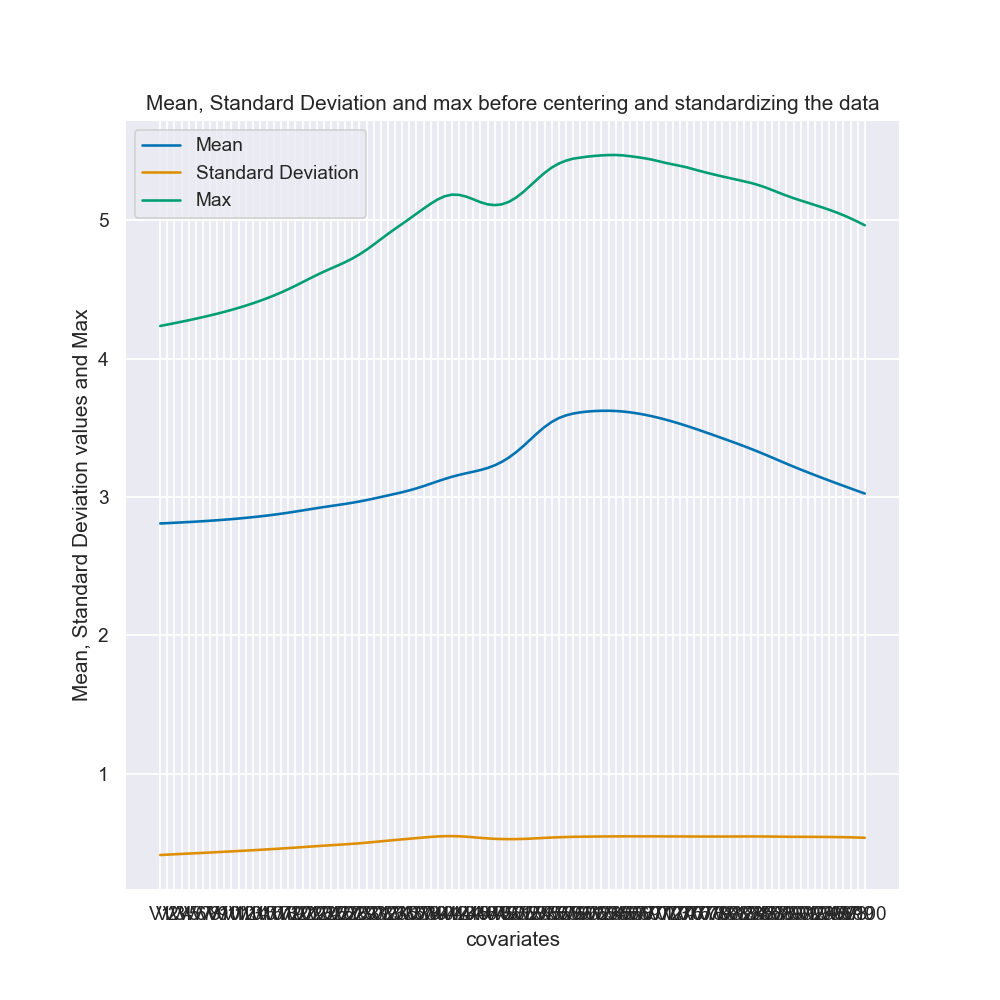

In [12]:
# Plot the mean , standard deviation and max of the data

y = data["fat"]
X = data.drop("fat", axis=1, inplace=False)
plt.figure(figsize=(8, 8))
plt.plot(X.mean(axis=0), label="Mean")
plt.plot(X.std(axis=0), label="Standard Deviation")
plt.plot(X.max(axis=0), label="Max")
plt.xlabel("covariates")
plt.ylabel("Mean, Standard Deviation values and Max")
leg = plt.legend(["Mean", "Standard Deviation", "Max"])
plt.title(
    "Mean, Standard Deviation and max before centering and standardizing the data")
plt.show()

<IPython.core.display.Javascript object>


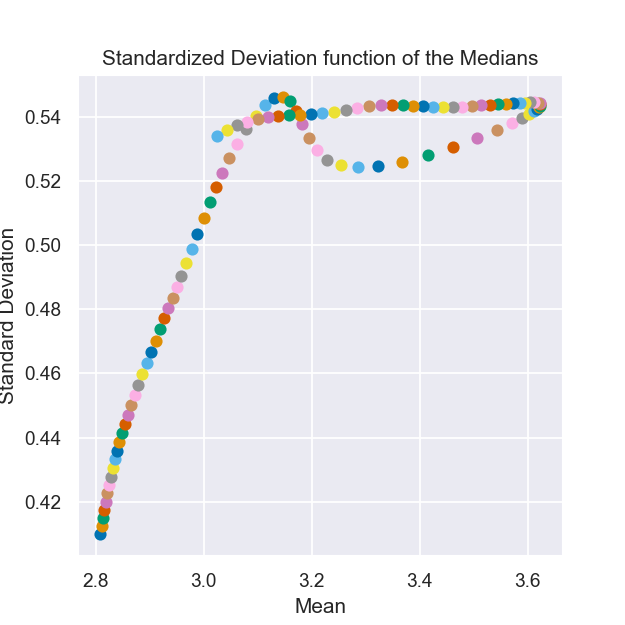

In [13]:
# Another plot : Standardized Deviation function of the Medians

plt.figure(figsize=(5, 5))
for item in (X.columns):
    plt.plot(np.mean(X[item]), np.std(X[item]), "o")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Standardized Deviation function of the Medians")
plt.show()

<blockquote> As it can be seen in the graphs above, the data is not centered, as most of the means are grater than 0.Also, the data isn’t normalized, as its values are not in the 0-1 range (maximum greater than 1). Finally, it isn’t standardized as the mean is different from zero and the standard deviation is different from one.

**(1.c) Separate the data in train and test and standardization**

In [14]:
# Separating the covariate data in train and test sets
# (test is equal to 0.25 of the total data).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED)

In [15]:
# Cheching dimension compatibility

print("the length of y_train is", len(y_train))
print("the length of y_test is", len(y_test))
print("the shape of X_train is", X_train.shape)
print("the Shape of X_test is", X_test.shape)
n, p = X_train.shape

the length of y_train is 161
the length of y_test is 54
the shape of X_train is (161, 100)
the Shape of X_test is (54, 100)


In [16]:
# standardizing the data

standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.fit_transform(X_test)
y_train_standardized = preprocessing.scale(y_train)
y_test_standardized = preprocessing.scale(y_test)

In [17]:
print("mean(X_train)= ", round(np.mean(X_train_standardized)),
      "and std(X_train)= ", np.std(X_train_standardized))
print("mean(y_train)= ", round(np.mean(y_train_standardized)),
      "and std(y_train)= ", np.std(y_train_standardized))
print("mean(X_test)= ", round(np.mean(X_test_standardized)),
      "and std(X_test)= ", np.std(X_test_standardized))
print("mean(y_test)= ", round(np.mean(y_test_standardized)),
      "and std(y_train)= ", np.std(y_test_standardized))

mean(X_train)=  0 and std(X_train)=  1.0
mean(y_train)=  0 and std(y_train)=  0.9999999999999998
mean(X_test)=  0 and std(X_test)=  1.0
mean(y_test)=  0 and std(y_train)=  0.9999999999999999


<IPython.core.display.Javascript object>


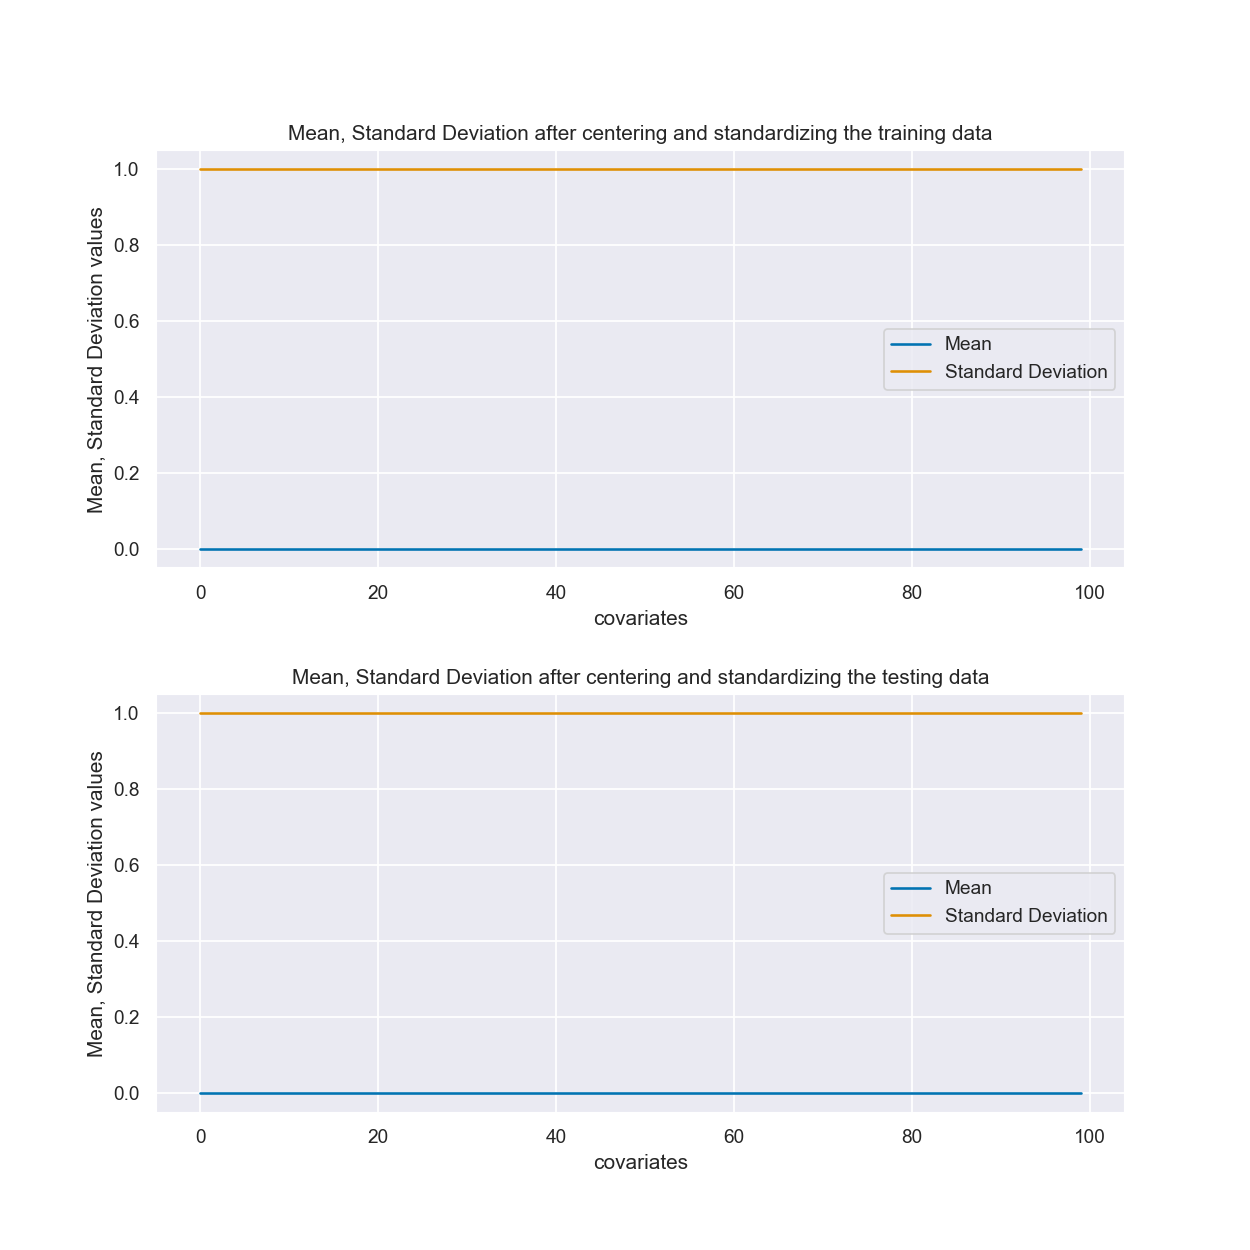

In [18]:
# Plot the mean , standard deviation and max of the standardized data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.3)

ax1.plot(X_train_standardized.mean(axis=0), label="Mean")
ax1.plot(X_train_standardized.std(axis=0), label="Standard Deviation")
ax1.set_xlabel("covariates")
ax1.set_ylabel("Mean, Standard Deviation values")
leg = ax1.legend(["Mean", "Standard Deviation"])
ax1.set_title(
    "Mean, Standard Deviation after centering and standardizing the training data")
ax2.plot(X_test_standardized.mean(axis=0), label="Mean")
ax2.plot(X_test_standardized.std(axis=0), label="Standard Deviation")
ax2.set_xlabel("covariates")
ax2.set_ylabel("Mean, Standard Deviation values")
leg2 = ax2.legend(["Mean", "Standard Deviation"])
ax2.set_title(
    "Mean, Standard Deviation after centering and standardizing the testing data")
plt.show()

<IPython.core.display.Javascript object>


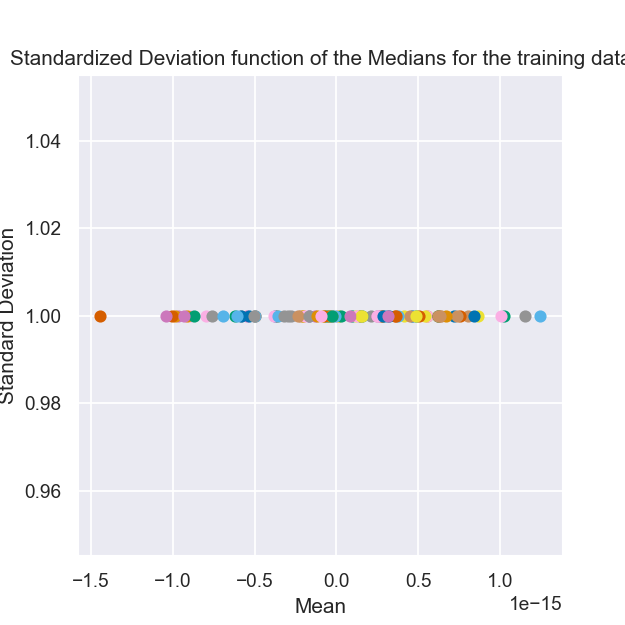

In [19]:
# Another plot : Standardized Deviation function of the Medians for the standardized data

plt.figure(figsize=(5, 5))
for i in range(len(X_train.columns)):
    plt.plot(np.mean(X_train_standardized[:, i]), np.std(
        X_train_standardized[:, i]), "o")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Standardized Deviation function of the Medians for the training data")
plt.show()

<blockquote> As it can be seen in the graphs above, the data becomes centered and standardized.


**(1.d) Fit a regular OLS**

In [20]:
# Fit the OLS model

reg = LinearRegression(fit_intercept=False).fit(
    X_train_standardized, y_train_standardized)

<blockquote> 
In general, in any method a centered variable means that the intercept doesn't need to me estimated. It is equal to zero. In particular, centering the variables is especially important for the regularized variants of OLS which are usually defined with centered variables so that we can skip estimating the intercept since they may give bad results in a non-centered data. 


**(1.e)  Store the R2 coefficients of the estimated model**


<blockquote>
The determination coefficient is defined as:

$R^2 = 1 - \frac{\sum_{i=1}^{n}{(y_i - \ \hat{y_i})^2}}{\sum_{i=1}^{n}{(y_i - \ \bar{y})^2}}$
    


In [21]:
# function to compute the determination coefficient

def determination_coefficient(Y_pred, Y):
    return 1-(np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2))

In [22]:
# Compute R2 coeff and store it in a data frame

y_pred = reg.predict(X_test_standardized)
df_coef = pd.DataFrame(columns=["methods", "R2_score"])
df_coef.loc[0, "methods"] = "OLS"
r2 = determination_coefficient(y_pred, y_test_standardized)
df_coef.loc[0, "R2_score"] = r2

In [23]:
# check the R2 function using the sklean metric

r2_check = r2_score(y_test_standardized, y_pred)
print("R2 score  = ", r2)
print("R2 using sklearn metric = ", r2_check)

R2 score  =  0.8665797675472777
R2 using sklearn metric =  0.8665797675472777


In [24]:
df_coef

,methods,R2_score
0,OLS,0.86658


## II. Variable selection


Forward Variable Selection is a method used on datasets to select the best features to describe the target. In each iteration, the algorithm calculates the t-statistic for each remaining variable and selects the variable with the highest t-statistic as the next feature to add to the list of selected variables. We calculate the p-value for the selected feature and add it to the list of p-values. The selected variable is then removed from the list of remaining variables. Moreover, we update the residuals by subtracting the prediction of the dependent variable based on the selected variable from the actual dependent variable values.

**PS:** Using the central limit theorem, we can suppose that the test distribution is normal. Thus, we use the p-values of the normal distribution.

In [25]:
def forward_variable_selection(X_train=X_train_standardized, Y_train=y_train_standardized):

    X = np.column_stack((np.ones((X_train.shape[0], 1)), X_train))
    # coping y into resid so that we don't modify original y
    resid = Y_train.copy()
    remaining_variables = list(range(1, p+1))
    T = np.zeros((p+1, p+1))
    n = X.shape[0]

    # lists of ordered variables and p_values
    variables = []
    p_values = []

    for i in range(p):
        # i-th step

        for k in remaining_variables:

            # calculation of the t-stat for the variable k at step i
            reg = LinearRegression().fit(X[:, [k]], resid)
            theta = np.array([reg.intercept_, reg.coef_[0]])
            er = reg.predict(X[:, [k]]) - resid
            sigma2 = 1/(n-1)*np.sum(er**2)  # estimator of variance
            s_n2 = 1/np.linalg.norm(X[:, [k]], 2)**2
            T[i, k] = abs(theta[1])/np.sqrt((sigma2*s_n2))  # test statistic

        # the selected variable at each step will have the largest T / smallest p_value
        best_variable = np.argmax(T[i, :])

        # p_values.append(2-2*norm.cdf(T[i,best_variable]))
        p_values.append(2*stat.norm.sf(T[i, best_variable]))
        variables.append(best_variable-1)

        # delete the used variable
        remaining_variables.remove(best_variable)

        # update resid
        regr = LinearRegression().fit(X[:, [best_variable]], resid)
        theta = np.array([regr.intercept_, regr.coef_[0]])
        theta.reshape(-1, 1)
        er = np.column_stack((np.ones((X.shape[0], 1)), X[:, best_variable]))
        resid = resid-np.dot(er, theta)

    return(variables, p_values)

<IPython.core.display.Javascript object>


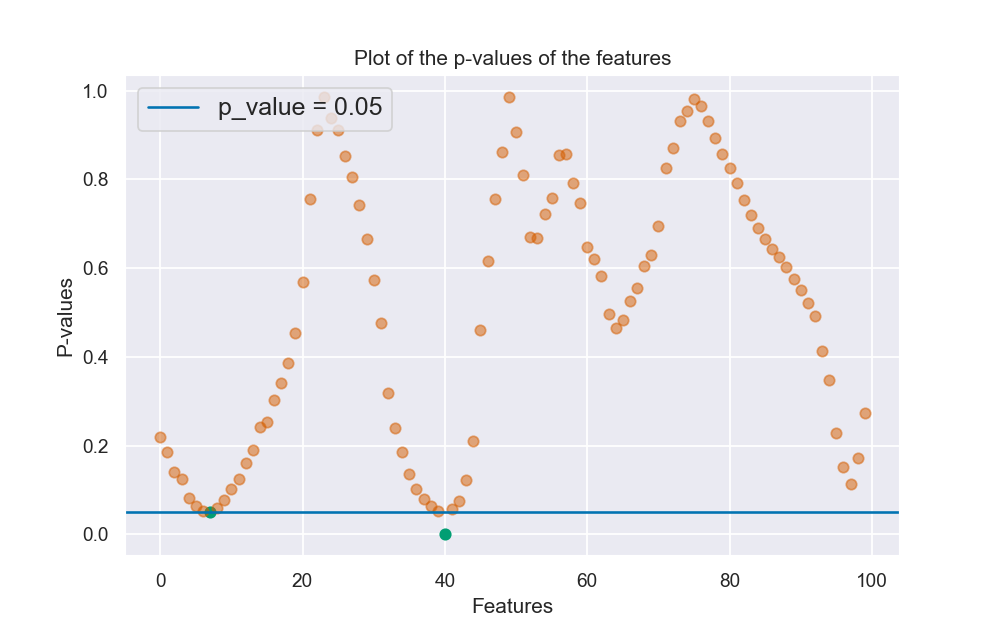

ordered variables [40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98, 13, 34, 1, 44, 0, 95, 14, 33, 15, 99, 16, 32, 17, 94, 18, 93, 19, 45, 64, 31, 65, 92, 63, 91, 66, 90, 67, 30, 20, 89, 62, 88, 68, 46, 61, 87, 69, 86, 60, 85, 53, 29, 52, 84, 70, 83, 54, 28, 59, 82, 21, 47, 55, 81, 58, 27, 51, 80, 71, 26, 56, 79, 57, 48, 72, 78, 50, 25, 22, 77, 73, 24, 74, 76, 75, 49, 23]
the associated p_values [1.0199212718253681e-17, 0.04997747914448598, 0.05234960690271296, 0.05315286181063363, 0.05727601870798288, 0.05842925556623824, 0.06309012680177042, 0.06430175649379385, 0.07614844288411589, 0.07772787950923808, 0.08033745440903724, 0.08229856513140586, 0.10154546650749759, 0.10292551753061362, 0.11403332915053828, 0.1256849721582822, 0.12237271201542868, 0.12385152474720966, 0.13554508795721135, 0.14069983767814473, 0.15180147231333357, 0.16182209850966267, 0.1729403802178423, 0.19089894262190255, 0.18482215962096937, 0.18660138947418936, 0.21137056692869094

In [26]:
# Using the function to compute the p-values and select the features

variables, p_values = forward_variable_selection(
    X_train_standardized, y_train_standardized)

# Plotting the p-values according to the features

selected_variables = []
plt.figure(figsize=(8, 5))
i = 0
while(p_values[i] < 0.05):
    plt.scatter(variables[i], p_values[i], color='g')
    selected_variables.append(variables[i])
    i += 1
while i < len(p_values):
    plt.scatter(variables[i], p_values[i], color='r', alpha=0.5)
    i += 1
plt.title("Plot of the p-values of the features")
plt.axhline(y=0.05, color='b', label="p_value = 0.05")
plt.ylabel("P-values")
plt.xlabel("Features")
plt.legend(loc=2, fontsize="large")
plt.show()

print("ordered variables", variables)
print("the associated p_values", p_values)
print("selected variables", selected_variables)

<blockquote> 
    
We can see in the graph above that we have **2 variables** having p-values smaller than 0.05 that we stored in the list selected_variables. They are V40 and V7

**(3) OLS on the variables with a p-value smaller than 0.05.**

In [27]:
# Select the features
X_selected = X_train_standardized[:, selected_variables]
X_test_selected = X_test_standardized[:, selected_variables]

# Applying the OLS
reg_selected = LinearRegression().fit(X_selected, y_train_standardized)
y_pred_selected = reg_selected.predict(X_test_selected)

# Compute the r2-score
r2_selected = determination_coefficient(y_test_standardized, y_pred_selected)
print("R2_score=", r2_selected)
df_coef.loc[1, "methods"] = "Forward_Variable_Selection"
df_coef.loc[1, "R2_score"] = r2_selected

R2_score= 0.8145925427878098


In [28]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593


**(4) Forward selection using SequentialFeatureSelector on a linear regression estimator**

In [29]:
# Use SequentialFeatureSelector with number = 2

sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=2)
sfs.fit(X_train_standardized, y_train_standardized)
sfs.get_feature_names_out()

array(['x19', 'x40'], dtype=object)

In [30]:
# Apply sfs

X_test_seq = sfs.transform(X_test_standardized)
X_train_seq = sfs.transform(X_train_standardized)

In [31]:
# Use OLS on the selected features  and compute R2 score

reg_seq = LinearRegression().fit(X_train_seq, y_train_standardized)
y_pred_seq = reg_seq.predict(X_test_seq)
df_coef_selected = determination_coefficient(y_test_standardized, y_pred_seq)
print("R2_score=", df_coef_selected)
df_coef.loc[2, "methods"] = "SFS"
df_coef.loc[2, "R2_score"] = df_coef_selected

R2_score= 0.7998191013114384


In [32]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593
2,SFS,0.799819


<blockquote>
    
Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. 

[Source : https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection]

Using this procedure we can easily see that the intuition behind the Forward-SFS is the same as the algorithm that we implemented earlier, it is greedy as well and performs an exhaustive map of all the remaining features applying a cross-validation technique to extract the variables that better describe the data using the cross-validation score. Otherwise, in the method that we implemented, we use directly the test hypothesis that we used in the course and compute iteratively the p-values to perform the selection. 


<blockquote>

**PS:** V40 was selected by both of the methods but our method chose V7 while SFS chose V19 as the second covariante.

**Bonus:** Lets see the correlation between these 2 covariantes.

the correlation between the two variables is : 0.9988017522104798


<IPython.core.display.Javascript object>


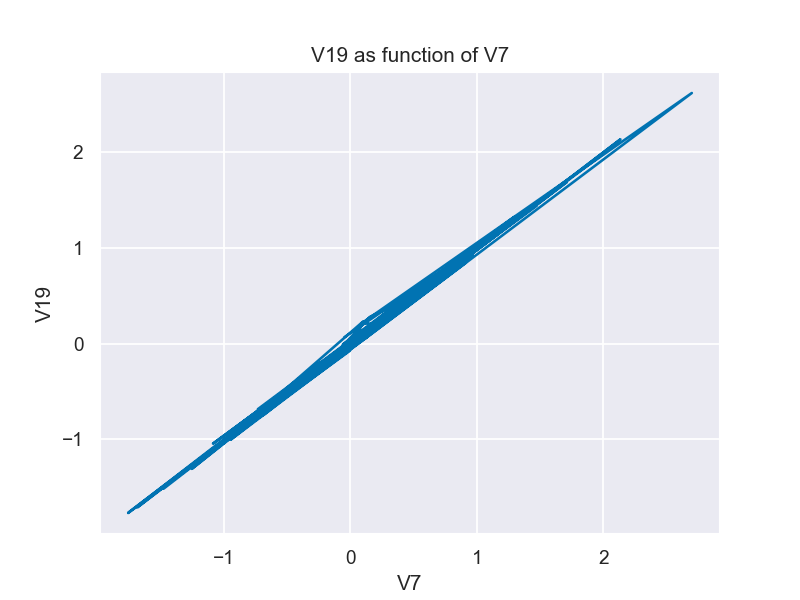

In [33]:
# check the correlation between the different variables of the 2 methods

print("the correlation between the two variables is :", np.corrcoef(
    X_test_standardized[:, 7], X_test_standardized[:, 19])[0, 1])
plt.plot(X_test_standardized[:, 7], X_test_standardized[:, 19])
plt.title("V19 as function of V7")
plt.xlabel("V7")
plt.ylabel("V19")
plt.show()

<blockquote>

The 2 covariantes are hightly correlated, that's why the R2 score obtained for Forward_Variable_Selection and SFS are close.

## III. Ridge

**(5) The ridge estimator using the expression derived in class**

$$ \theta_n^{rdg}= ( X^{T}X + n.\alpha.I_p )^{-1}X^{T}.Y\space $$  

In [34]:
# This function calculates the ridge estimator according to the data and the regularization parameter

def theta_ridge(X=X_train_standardized, y=y_train_standardized, _alpha=1):
    n = X.shape[0]
    p = X.shape[1]
    return(np.dot(np.linalg.inv(np.dot(X.T, X) + n*_alpha * np.identity(p)), np.dot(X.T, y)))

In [35]:
# example for alpha =1

estimator = theta_ridge(X=X_train_standardized,
                        y=y_train_standardized, _alpha=1)
estimator

array([-0.03505295, -0.03601523, -0.03687889, -0.03765249, -0.03830985,
       -0.03881956, -0.03915431, -0.03930158, -0.03925817, -0.03901048,
       -0.03856954, -0.03789937, -0.0369476 , -0.03565978, -0.03400782,
       -0.03199897, -0.02964354, -0.0269175 , -0.0238196 , -0.02041814,
       -0.01686922, -0.01342357, -0.01031873, -0.00765743, -0.00534731,
       -0.00311568, -0.00051228,  0.00293085,  0.00745705,  0.01310214,
        0.01958009,  0.02638797,  0.03300841,  0.03914816,  0.04484521,
        0.0503811 ,  0.05593426,  0.06123229,  0.06569545,  0.06858179,
        0.06911333,  0.06665021,  0.06093349,  0.05224675,  0.0414337 ,
        0.02975638,  0.01855167,  0.0089959 ,  0.00151795, -0.0038587 ,
       -0.00732034, -0.00919522, -0.00987361, -0.00977375, -0.0092944 ,
       -0.00874831, -0.00833667, -0.00811781, -0.00809056, -0.0081772 ,
       -0.00826298, -0.008327  , -0.0083212 , -0.00827064, -0.00817678,
       -0.00804085, -0.00786874, -0.00761504, -0.00722761, -0.00

**(5.a)Test of a penalty parameter $\alpha$ spaced evenly on a log scale 10e-9 to 10e2 and plot**

<IPython.core.display.Javascript object>


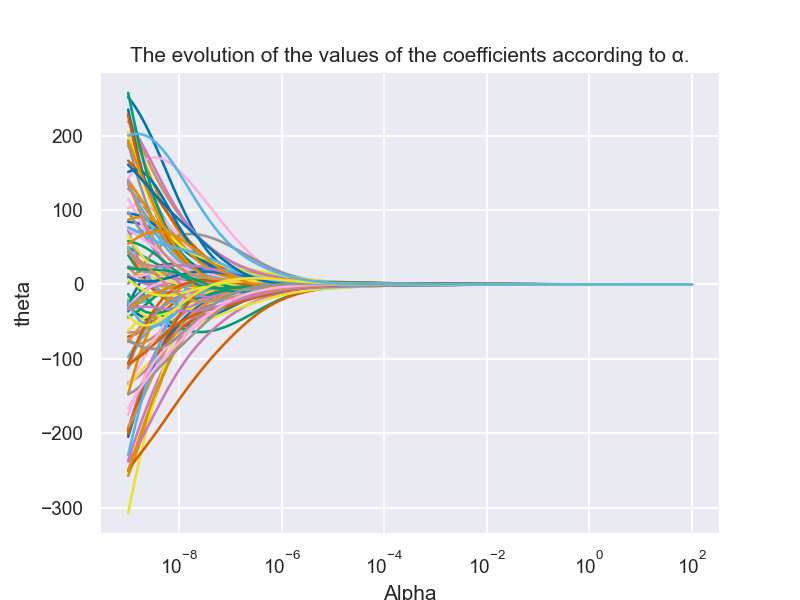

In [36]:
# Test of a penalty parameter alpha spaced evenly on a log scale 10e-9 to 10e2.

estimators = []
alpha_interval = np.logspace(-9, 2, 100)  # interval of spaced evenly of alphas
for alpha in alpha_interval:
    estimators.append(theta_ridge(_alpha=alpha))

# Plotting the variation of the estimator in function of the variation of alpha in a logarithmic scale

plt.figure()
for i in range(X_train_standardized.shape[1]):
    plt.plot(alpha_interval, [estimators[k][i]
             for k in range(len(estimators))])
    plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("theta")
plt.title("The evolution of the values of the coefficients according to α.")
plt.show()

<blockquote>
    
We can notice that the estimators converge  to zero as we increase the penalty parameter alpha due to the fact that the regularization term became the most significant .

**(5.b) Computing and Plotting how MSE of both the train and test sets change with $\alpha$.**

In [37]:
# function to compute the MSE for train and test

def mse_train_test_ridge(X_train=X_train_standardized, y_train=y_train_standardized, X_test=X_test_standardized, y_test=y_test_standardized):

    # intialization
    ridge_parameters = np.logspace(-9, 2, 100)
    mse_train_list = []
    mse_test_list = []

    for alpha in ridge_parameters:

        # compute teta ridge
        teta_ridge = theta_ridge(_alpha=alpha)

        # predict y_train and compute the error
        y_train_pred = np.dot(X_train, teta_ridge)
        mse_train = mean_squared_error(y_train, y_train_pred)

        # predict y_test and compute the error
        y_test_pred = np.dot(X_test, teta_ridge)
        mse_test = mean_squared_error(y_test, y_test_pred)

        # store the error values
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)

    return(mse_train_list, mse_test_list)

<IPython.core.display.Javascript object>


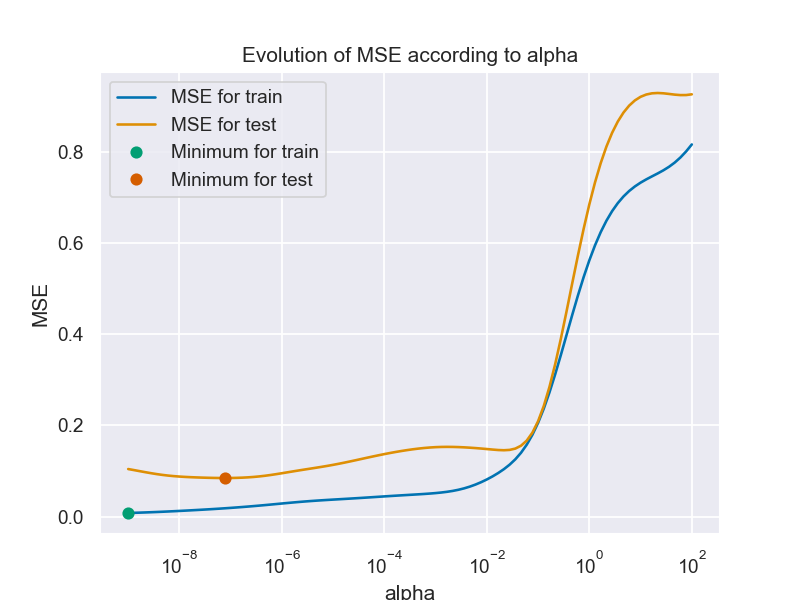

In [38]:
# Use the function to generate the error lists
mse_train_list, mse_test_list = mse_train_test_ridge(
    X_train_standardized, y_train_standardized, X_test_standardized, y_test_standardized)

# alpha giving minimum error for train
error_train_min = alpha_interval[mse_train_list.index(np.min(mse_train_list))]

# alpha giving minimum error for test
error_test_min = alpha_interval[mse_test_list.index(np.min(mse_test_list))]

# plot the MSE according to the alpha

plt.figure()
plt.plot(alpha_interval, mse_train_list, label="MSE for train")
plt.plot(alpha_interval, mse_test_list, label="MSE for test")
plt.xscale('log')
plt.ylabel("MSE")
plt.xlabel("alpha")
plt.title("Evolution of MSE according to alpha")
plt.plot(error_train_min, np.min(mse_train_list),
         "o", label="Minimum for train")
plt.plot(error_test_min, np.min(mse_test_list), "o", label="Minimum for test")
plt.legend(loc="upper left")
plt.show()

<blockquote>


- For the lower values of $\alpha$ we notice that the results are much better and when $\alpha$ becomes larger, the MSE starts having higher values. 
    
- $\alpha$ with smallest training error=  1e-09

- We can see that the MSE is  lower on the train set than the test set, this is the normal case due to the fact we are performing the training on the train set. 


**(5.c) Computing R2 value for the best performing value of α (the one with smallest training error)**

In [39]:
theta_ridge_min = theta_ridge(_alpha=error_train_min)
y_test_pred_ridge = np.dot(X_test_standardized, theta_ridge_min)
score = determination_coefficient(y_test_standardized, y_test_pred_ridge)
print("alpha with smallest training error= ", error_train_min)
print("R2_score=", score)
df_coef.loc[3, "methods"] = "Ridge"
df_coef.loc[3, "R2_score"] = score

alpha with smallest training error=  1e-09
R2_score= 0.9323922671142688


In [40]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593
2,SFS,0.799819
3,Ridge,0.932392


## IV. Crossvalidation, Lasso and elastic net


**(6) Use the sklearn version of the Lasso** 

In [41]:
# set lambda interval
lambda_interval = np.logspace(-5, -2, 100)
estimators_lasso = []

# fit lasso
for lamda in lambda_interval:
    clf = Lasso(lamda, max_iter=50000, tol=0.05)
    clf.fit(X_train_standardized, y_train_standardized)
    theta_lasso = clf.coef_
    estimators_lasso.append(theta_lasso)

**(6.a) Warning of the Lasso function** 

Warnings can arise in the scikit-learn Lasso implementation when the optimization algorithm is **unable to converge to a solution that meets the desired tolerance level.** This can happen for a variety of reasons, such that the poor choice of initial parameters: (If they are not close enough to the optimal solution, the optimization algorithm may have difficulty finding the right solution ) and  multicollinearity ( If the input features are highly correlated, the optimization algorithm may have difficulty finding a solution that meets the desired tolerance level) 

To avoid these warnings, we can **increase the "tol" parameter** that determines the tolerance level for the optimization algorithm. Increasing this parameter will cause the optimization algorithm to be more tolerant of deviations from the optimal solution, making it more likely to converge. Moreover we can **increase the "max_iter" parameter** that determines the maximum number of iterations the optimization algorithm will perform. Increasing this parameter will allow the optimization algorithm to continue searching for a solution even if it has not yet met the desired tolerance level, increasing the chances of finding a solution.

Here, we chose **max_iter =50000** and **tol = 0.05**

**(6.b) The number of coefficients that are different from 0 for each value of $\alpha$**

<IPython.core.display.Javascript object>


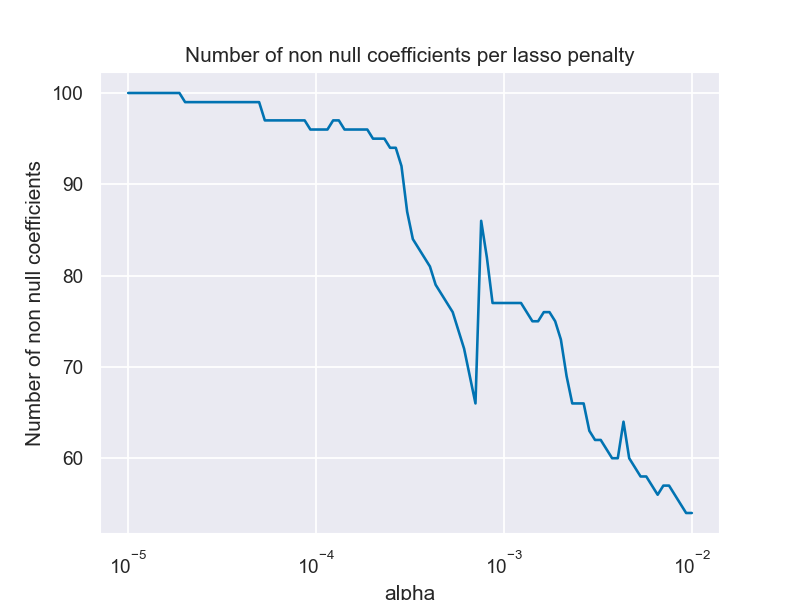

In [42]:
# initialisation
nbr_coeff_non_null = []

# computing for every parameter
for i in range(len(estimators_lasso)):
    nbr_coeff_non_null.append(np.sum(estimators_lasso[i] != 0))

# Plot the resutts
plt.figure()
plt.plot(lambda_interval, nbr_coeff_non_null)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("Number of non null coefficients")
plt.title("Number of non null coefficients per lasso penalty")
plt.show()

<blockquote> 
     Thus, we can say that as alpha increases, the number of zero coefficients increases as the regularization term becomes more and more significant. Logically, the function should be decreasing. Here, the fluctuations are related to some solutions depending on the data itself.

**(6.c) Computing and Plotting how MSE of both the train and test sets change with $\alpha$.**

In [43]:
# function to compute the MSE for train and test

def mse_train_test_lasso(X_train, y_train, X_test, y_test):
    mse_train_list = []
    mse_test_list = []
    for theta in estimators_lasso:

        # predict y_train and compute the error
        y_train_pred = np.dot(X_train, theta)
        mse_train = mean_squared_error(y_train, y_train_pred)

        # predict y_test and compute the error
        y_test_pred = np.dot(X_test, theta)
        mse_test = mean_squared_error(y_test, y_test_pred)

        # store the error
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)

    return(mse_train_list, mse_test_list)

<IPython.core.display.Javascript object>


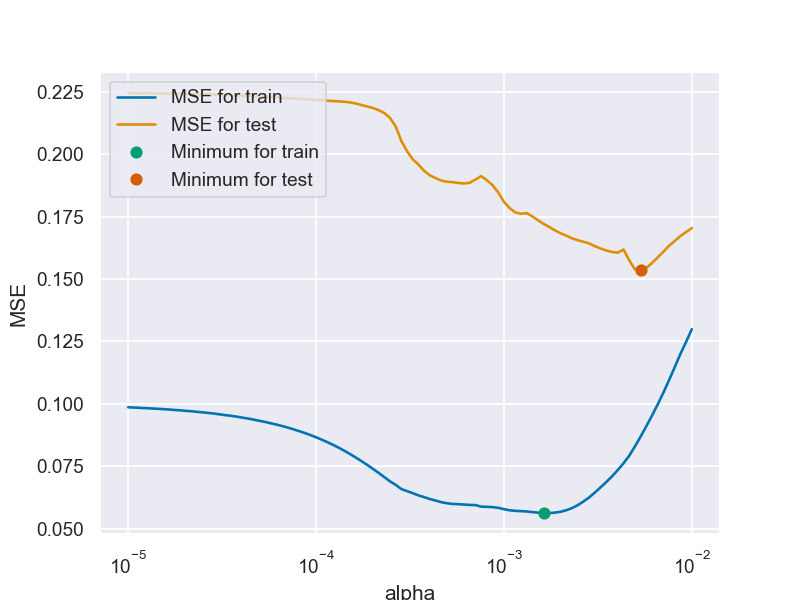

In [44]:
# Use the function to generate the error lists
mse_train_lasso, mse_test_lasso = mse_train_test_lasso(
    X_train_standardized, y_train_standardized, X_test_standardized, y_test_standardized)

# alpha giving minimum error for train
error_train_min = lambda_interval[mse_train_lasso.index(
    np.min(mse_train_lasso))]

# alpha giving minimum error for test
error_test_min = lambda_interval[mse_test_lasso.index(np.min(mse_test_lasso))]

# plot the MSE according to the alpha
plt.figure()
plt.plot(lambda_interval, mse_train_lasso, label="MSE for train")
plt.plot(lambda_interval, mse_test_lasso, label="MSE for test")
plt.xscale('log')
plt.ylabel("MSE")
plt.xlabel("alpha")
plt.plot(error_train_min, np.min(mse_train_lasso),
         "o", label="Minimum for train")
plt.plot(error_test_min, np.min(mse_test_lasso), "o", label="Minimum for test")
plt.legend(loc="upper left")
plt.show()

print()

**(6.d) Computing R2 value for the best performing value of $\alpha$ (the one with smallest test error)**

In [45]:
alpha_lasso_min = error_test_min
clf = Lasso(alpha_lasso_min, max_iter=50000, tol=0.05)
clf.fit(X_train_standardized, y_train_standardized)
y_predict_lasso = np.dot(X_test_standardized, clf.coef_)
score = determination_coefficient(y_test_standardized, y_predict_lasso)
print("alpha with smallest test error= ", alpha_lasso_min)
print("R2_score=", score)
df_coef.loc[4, "methods"] = "Lasso"
df_coef.loc[4, "R2_score"] = score

alpha with smallest test error=  0.005336699231206312
R2_score= 0.8841489445574328


In [46]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593
2,SFS,0.799819
3,Ridge,0.932392
4,Lasso,0.884149


**(7) Use the sklearn version of the Elastic net and Validate with a cross-validation that I implement**

$\hat{\boldsymbol{\theta}}_\lambda=\operatorname{argmin}_{\boldsymbol{\theta} \in \mathbb{R}^p}\left[\frac{1}{2}\|\mathbf{y}-\boldsymbol{X} \boldsymbol{\theta}\|_2^2+\alpha\left(\gamma\|\boldsymbol{\theta}\|_1+(1-\gamma) \frac{\|\boldsymbol{\theta}\|_2^2}{2}\right)\right]$

According to the documentation of ElasticNet ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) 

1. $\alpha = \alpha_{lasso}+ \alpha_{ridge}$

2. $\gamma = \frac{\alpha_{lasso}}{\alpha_{lasso}+\alpha_{ridge}}$

**For $\gamma=0$ : Ridge penalization**

**For $\gamma=1$ :  Lasso penalization**

In [47]:
def k_fold_cross_validation(reg, X, y, k):
    n = len(y)
    indices = np.arange(n)
    np.random.shuffle(indices)
    chunk = n // k
    mean_scores = []

    for i in range(k):
        test_indices = indices[i * chunk: (i + 1) * chunk]
        train_indices = np.delete(indices, test_indices)
        X = pd.DataFrame(data=X)
        X_train, y_train = X.loc[train_indices], y[train_indices]
        X_test, y_test = X.loc[test_indices], y[test_indices]

        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        mean_scores.append(r2_score(y_test, y_pred))

    return np.mean(mean_scores)

In [48]:
# In this code I couldn't find good way to avoid the warning by changing the parameters unless tol>0.1
# But for tol>0.1 the r2_score becomes bad, so I used simplefilter so fiter convergence warnings and keep the good results

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# intervals for the parameters

alpha_ridge = np.logspace(-10, 3, 100)
alpha_lasso = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

# The crossvalidation is performed to every possible values of alpha and beta

params = []
mean_scores = []
for b in alpha_ridge:
    for a in alpha_lasso:

        # define the ElasticNet parameters
        alpha = a+b
        l1_ratio = a / alpha

        # max_iter and tol chosen to avoid warnings
        enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                          random_state=SEED, tol=0.01)

        # Perform cross-validation

        mean_scores.append(k_fold_cross_validation(
            enet, X_train_standardized, y_train_standardized, k=5))
        params.append((b, a))

In [49]:
# Look for the best parameters and the corresponding score

alpha_ridge_opt, alpha_lasso_opt = params[mean_scores.index(
    np.max(mean_scores))]
print("alpha_ridge_opt= ", alpha_ridge_opt,
      " and alpha_lasso_opt= ", alpha_lasso_opt)
print("best score for enet= ", np.max(mean_scores))
df_coef.loc[5, "methods"] = "ElasticNet"
df_coef.loc[5, "R2_score"] = np.max(mean_scores)

alpha_ridge_opt=  0.004132012400115343  and alpha_lasso_opt=  0
best score for enet=  0.9423481344672993


<IPython.core.display.Javascript object>


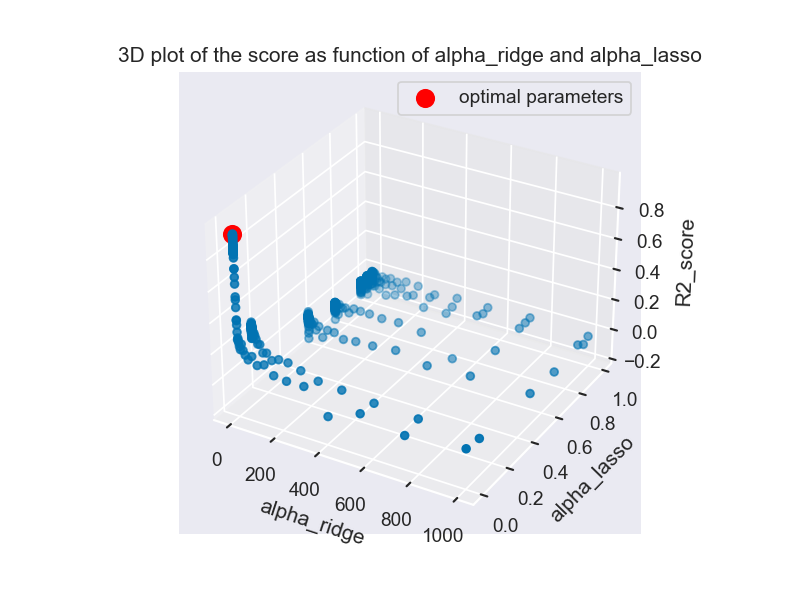

In [50]:
# Bonus 3D plot

ridge = [params[i][0] for i in range(len(params))]
lasso = [params[i][1] for i in range(len(params))]
ax = plt.axes(projection='3d')
ax.set_title("3D plot of the score as function of alpha_ridge and alpha_lasso")
ax.set_xlabel("alpha_ridge")
ax.set_ylabel("alpha_lasso")
ax.set_zlabel("R2_score")
ax.scatter(alpha_ridge_opt, alpha_lasso_opt, np.max(mean_scores),
           c='red', marker='o', s=100, label="optimal parameters")
ax.legend()
ax.scatter3D(ridge, lasso, mean_scores)
plt.show()

In [51]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593
2,SFS,0.799819
3,Ridge,0.932392
4,Lasso,0.884149
5,ElasticNet,0.942348


<blockquote>

Since ElasticNet is a method that explores both Ridge and Lasso regularization, we expected to get better results for the coefficient of determination, especially when we "fine-tuned" the ElasticNet model parameters using the cross-validation technique.

In this part, the most challenging task for me was to avoid the convergence warning when running the cross-validation on the ElasticNet model. In fact, using higher values of max_iter was not enough to solve the problem. On the other hand, increasing tol to a value of the same order as 0.1 affects the performance of the algorithm by giving a faster convergence but a poor result. 

I chose to avoid the convergence warning by using a **simple filter** and keeping the good performance of the model : r2_score=0.0.94.

## V. Bootstrap

**(8) - Plot
the dataset and the regression line fitted with the whole sample.**

<IPython.core.display.Javascript object>


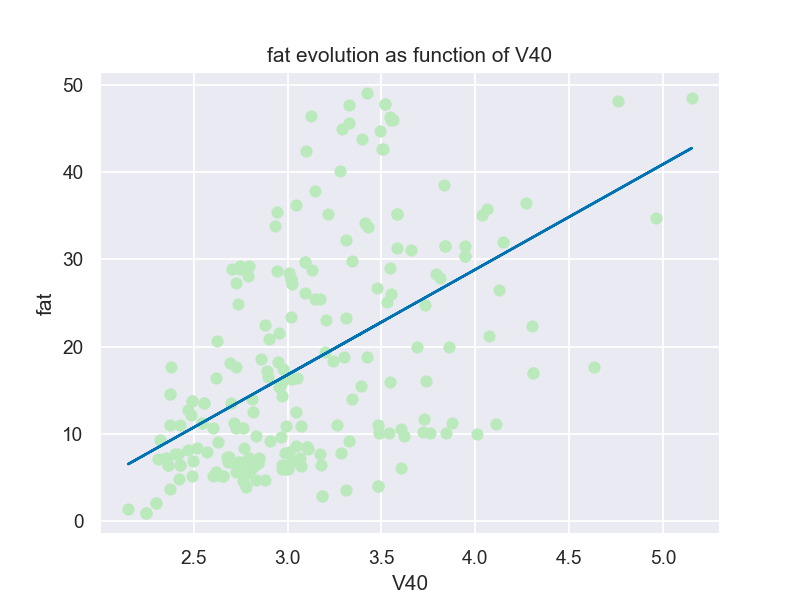

In [52]:
# Using V40 and plotting

X = data['V40'].to_numpy().reshape(-1, 1)
y = data['fat']
reg = LinearRegression().fit(X, y)
theta = list([reg.intercept_, reg.coef_[0]])
y_pred = theta[0] + theta[1]*X

# I chose the colors using a color blind-friendly palette
plt.figure()
plt.plot(X, y_pred, 'b')
plt.scatter(X, y, color='#bae9bc')
plt.xlabel('V40')
plt.ylabel('fat')
plt.title('fat evolution as function of V40')
plt.show()

**(8) - Generate 50 bootstrap samples (part1): Plot the regression lines**

<IPython.core.display.Javascript object>


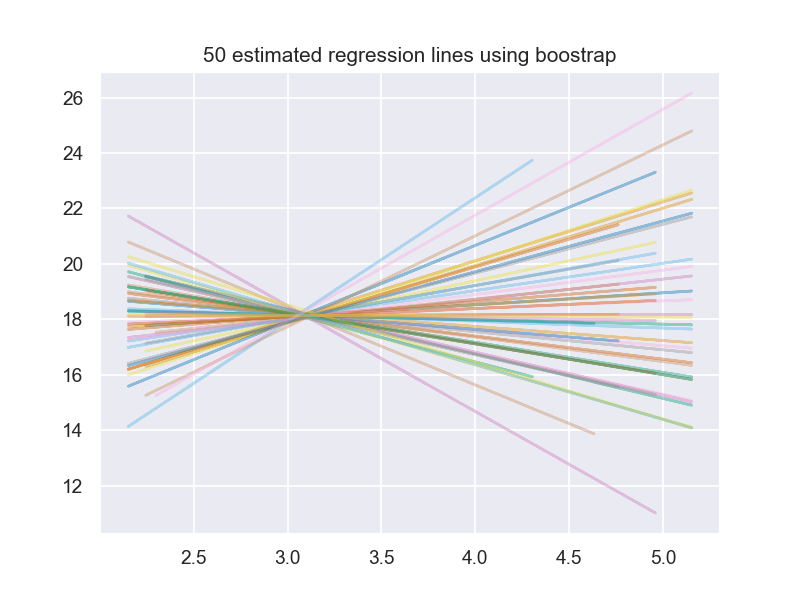

In [53]:
# Plot the 50 estimated regression lines in the same figure
n_samples = 50
samples = np.random.choice(
    X.reshape(len(X)), (n_samples, len(X)), replace=True)

alpha = 0.05

plt.figure()
for i in range(n_samples):
    reg = LinearRegression().fit(samples[i].reshape(-1, 1), y)
    theta = list([reg.intercept_, reg.coef_[0]])
    y_pred = theta[0] + theta[1]*samples[i]

    # plot the line
    plt.plot(samples[i], y_pred, alpha=.4, label=i)

    plt.title("50 estimated regression lines using boostrap")

plt.show()

**(8) - Generate 50 bootstrap samples (part2) : Plot the regression lines and confidence intervals**

we set  $\alpha=0.05$

In the general case : 

$$\hat{\sigma}_n^2=\frac{\sum_{i=1}^n\left(Y_i-x_i^T \hat{\boldsymbol{\theta}}_n\right)^2}{(n-p-1)}$$
and Confidence intervals: 
$$\mathrm{CI}(x)=x^T \hat{\boldsymbol{\theta}}_n \pm Q_{n-p-1}(1-\alpha / 2) \hat{\sigma} \sqrt{x^T\left(X^T X\right)^{-1} x}$$

More particuliary, we are dealing with the one dimensional case, i.e p=1. So, we can implement easily the given formula.

<IPython.core.display.Javascript object>


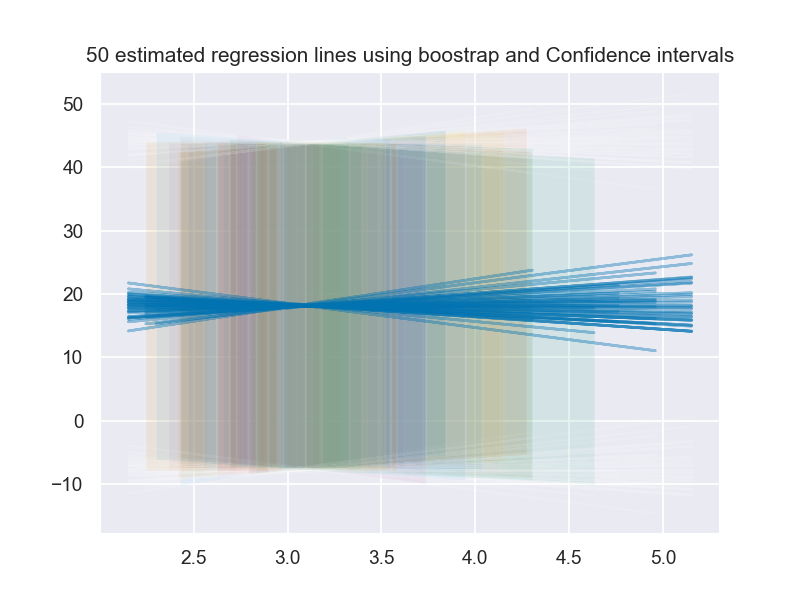

In [54]:
# Plot the 50 estimated regression lines in the same figure and CI

alpha = 0.05

plt.figure()
for i in range(n_samples):
    reg = LinearRegression().fit(samples[i].reshape(-1, 1), y)
    theta = list([reg.intercept_, reg.coef_[0]])
    y_pred = theta[0] + theta[1]*samples[i]

    # compute the CI using the formula of ex12

    mse = mean_squared_error(y_pred, y)
    se_pred = np.sqrt(mse * (1 + 1/n_samples + (samples[i] - np.mean(samples[i]))
                             ** 2 / ((np.sum((samples[i] - np.mean(samples[i]))**2)))))
    # Calculate the t-value
    t = stats.t.ppf(1 - alpha / 2, n_samples - 2)
    # Calculate the prediction intervals
    low = y_pred.reshape(-1, 1) - t * se_pred
    up = y_pred.reshape(-1, 1) + t * se_pred

    # plot the results

    # plot the data points
    #plt.plot(X[i],y[i],'o',label='data points')

    # plot the line
    plt.plot(samples[i], y_pred, alpha=.4, label=i, c='b')
    # plot the CI
    plt.fill_between(samples[i], low[:, 0], up[:, 0],
                     alpha=0.1, label='Prediction interval')

    plt.title(
        "50 estimated regression lines using boostrap and Confidence intervals")

plt.show()

## VI. PCA

**(9) The covariance matrix and the singular value decomposition of the covariance matrix**

In [55]:
# Covariance matrix
cov_matrix = np.cov(X_train_standardized.T)

# SVD decomposition
U, s, V = np.linalg.svd(cov_matrix)

**(9.a) Plot a heatmap of the covariance matrix**

<IPython.core.display.Javascript object>


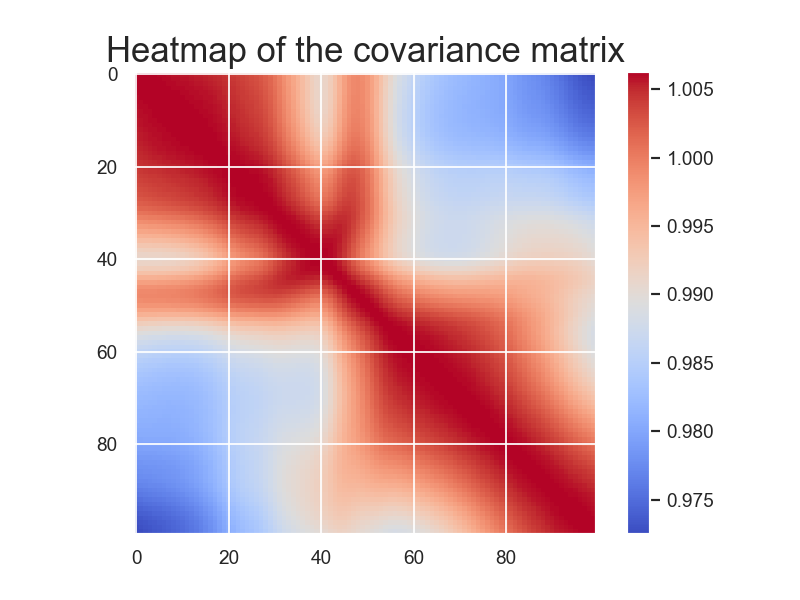

In [56]:
# plot of the heatmap of the covariance matrix.


plt.imshow(cov_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("Heatmap of the covariance matrix", fontsize=20)
plt.show()

**(9.c) Plot the amount of variance explained by the first k components**

The singular value decomposition is $X=USV^⊤$,
then the amount of overall variance explained by the i-th pair of SVD vectors (i-th SVD "mode") is given by 
$ R^2=\frac{s_i^2}{ \sum_j s_j^2}$, where $s_j$ are singular values (diagonal of S).

In [57]:
# Function caculating a list of amount of variance expalained using [1..K] components

def plot_var(s, k=2):
    explained_variance = 0
    accumul_variances = []
    var = np.sum(s**2)

    for i in range(k):
        explained_variance += s[i]**2/var
        accumul_variances.append(explained_variance)

    return(accumul_variances, explained_variance)

expalained variance using  100  components = 99.99999999999999 %


<IPython.core.display.Javascript object>


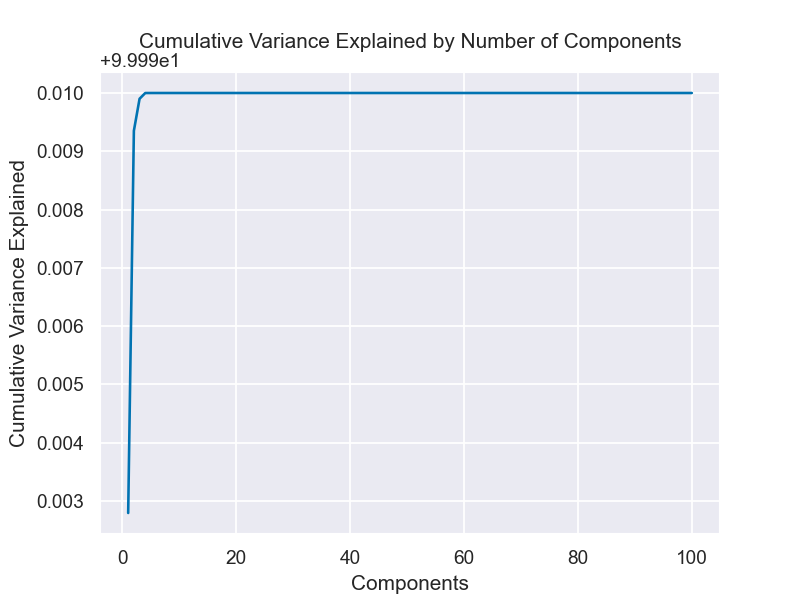

In [58]:
# Plot of k=100

k = 100
accumul_variances, explained_variance = plot_var(s, k)
print("expalained variance using ", k,
      " components =", explained_variance*100, "%")
accumul_variances = [100*x for x in accumul_variances]
plt.title("Cumulative Variance Explained by Number of Components", y=1.03)
plt.xlabel('Components')
plt.ylabel('Cumulative Variance Explained')
plt.plot(range(1, k+1), accumul_variances)
plt.show()

We can notice that using some components we can explain more than 99% of the data. Let's try  k=2

expalained variance using  2  axes = 99.99935126267613 %


<IPython.core.display.Javascript object>


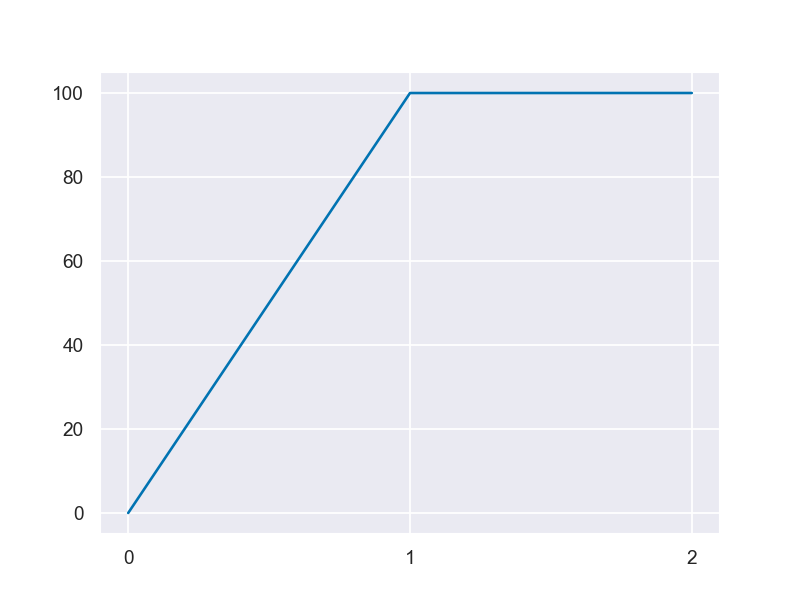

In [59]:
# I added for 0 component , 0 variance explained to impve the plot

k = 2
accumul_variances, explained_variance = plot_var(s, k)
print("expalained variance using ", k, " axes =", explained_variance*100, "%")
accumul_variances = [100*x for x in accumul_variances]
plt.xticks([i for i in range(k+1)])
plt.plot(range(0, k+1), [0]+accumul_variances)
plt.show()

<blockquote>

**Conclusion:**  Using only the first two components we can explain more than 99.99% of the variance.

**(9.c) Plot the projected data using as color the value of y**

<IPython.core.display.Javascript object>


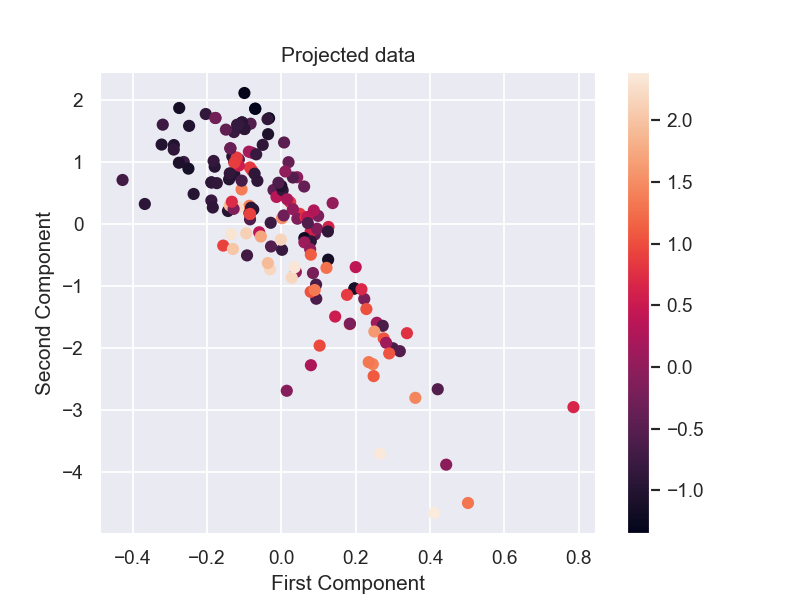

In [60]:
# projected data for train and the test set,

pca = np.dot(X_train_standardized, U[:2].T)

# Plot the projected data with colors based on the target column
plt.scatter(pca[:, 0], pca[:, 1], c=y_train_standardized)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Projected data')
plt.colorbar()
plt.show()

In [61]:
# set interval of k:
interval = range(2, X_train_standardized.shape[1]+1, 1)
max_r2 = 0
r2_score = []
best_number = 2

for k in interval:
    # Fit Ols using k components
    pca_train = np.dot(X_train_standardized, U[:k].T)
    reg = LinearRegression()
    reg.fit(pca_train, y_train_standardized)

    # predict using Ols
    pca_test = np.dot(X_test_standardized, U[:k].T)
    y_pca = reg.predict(pca_test)

    # r2 score
    r2 = determination_coefficient(y_pca, y_test_standardized)
    if r2 > max_r2: #look for the best r2 score
        max_r2 = r2
        best_number = k
    r2_score.append(r2)
df_coef.loc[6, "methods"] = "PCA"
df_coef.loc[6, "R2_score"] = max_r2

<IPython.core.display.Javascript object>


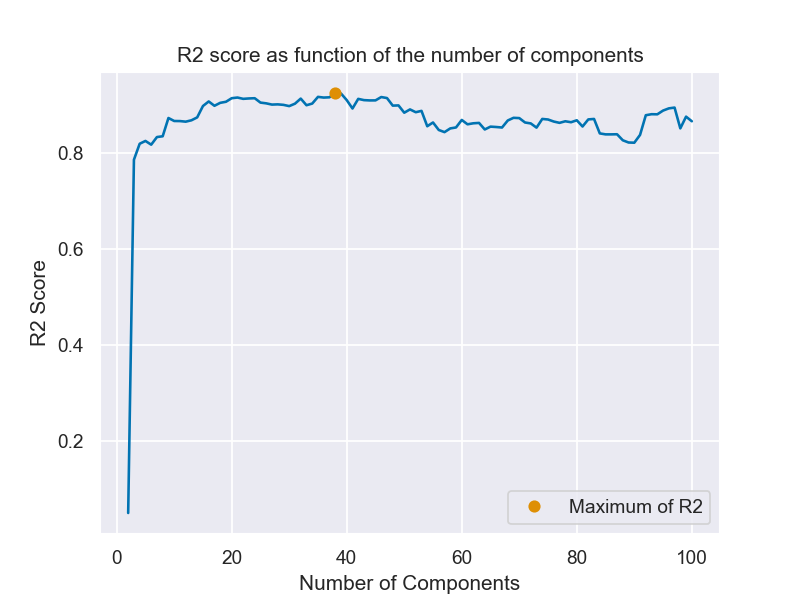

number of components = 38
best r2 score =  0.9254681793777129


In [62]:
# Plot the R2 scores for each value of k
plt.plot(interval, r2_score)
plt.plot(best_number, max_r2, 'o', label="Maximum of R2")
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.title('R2 score as function of the number of components')
plt.legend()
plt.show()
print("number of components =", best_number)
print("best r2 score = ", max_r2)

In [63]:
df_coef

,methods,R2_score
0,OLS,0.86658
1,Forward_Variable_Selection,0.814593
2,SFS,0.799819
3,Ridge,0.932392
4,Lasso,0.884149
5,ElasticNet,0.942348
6,PCA,0.925468


## VII.Comparison of the models

**(10) Summary**

<blockquote> 
    

**Summarising the results of all our methods, most of them gave us good results according to the determination coefficient $\hat{R}^2$.**
    
* **OLS:**
    Determination coefficient: 0.86658


* **OLS after forward variable selection:**
    Determination coefficient: 0.814593
    
    
* **OLS after SequentialFeatureSelector:** 
    Determination coefficient: 0.799819
    
    
* **Ridge:**
    Determination coefficient:  0.932392
    
    
* **Lasso:**
    Determination coefficient: 0.851281
    
    
* **ElasticNet:**
    Determination coefficient: 0.941535
    
    
* **PCA:**
     Determination coefficient: 0.925468
   

**Interpretation:**

If we look at our starting data, from the beginning, we can notice that the data are smooth and have many parameters with similar values and characteristics (mean, max, std..). The general insight from comparing the l1 and l2 regularizations is that Lasso tends to work well if there are a small number of significant parameters and the others are close to zero. Ridge works well if there are many significant parameters with roughly the same value. Using this intuition, we can predict the same results that were proven in this TP where the Ridge version gave us better results than Lasso.    
    
More particularly, ElasticNet gave us the best results. It is better than Ridge and Lasso since it takes the best out of both methods and combines their regularisation term. PCA gave decent results using only 38 components even though it generated some data loss.  Lasso gave average results as good as regular OLS. This can also be explained by the increase of the tol parameter to assure convergence and tolerate the constraints. On the other hand, both of the forward variable selection methods with only two variables didn't perform very well. This might be better if we chose a higher threshold for the p-values of the selected variables to include more variables in the learning process.        
    


**References:** 

In order to make the notebook as clear as possible, i referred to some websites that are dedicated to how to design a colorblind-friendly notebook , use PEP8 Style and make the jupiter netbook clean.

* https://ploomber.io/blog/clean-nbs/
* https://www.earthdatascience.org/courses/intro-to-earth-data-science/write-efficient-python-code/intro-to-clean-code/python-pep-8-style-guide/
* https://www.datylon.com/blog/data-visualization-for-colorblind-readers
* https://www.youtube.com/watch?v=Zrxi86KMT7k&ab_channel=ParagDhawan

**Souheib Ben Mabrouk, updated on February 15, 2023**